In [1]:
import sys
import os

sys.path.append(os.path.abspath("../"))

from src.data.data_loading import load_cleaned_dataset

# Load the cleaned dataset
df = load_cleaned_dataset()

# Display the first few rows
print(df.head())

      bearer_id                start  start_ms                  end  end_ms  \
0  1.311448e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   662.0   
1  1.311448e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   606.0   
2  1.311448e+19  2019-04-09 17:42:00      10.0  2019-04-25 11:58:00   652.0   
3  1.311448e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   171.0   
4  1.311448e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   954.0   

   dur._(ms)          imsi  msisdn/number          imei  \
0   398786.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   398786.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   398786.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   398786.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   398786.0  2.082014e+14   3.369980e+10  3.540701e+13   

      last_location_name  ...  netflix_dl_(bytes)  netflix_ul_(bytes)  \
0  9.16456699548519E+015  ...           8198936.0           9656251.0   
1                L77566A

In [2]:
from src.analysis.user_engagement import aggregate_user_engagement
# Aggregate engagement metrics
aggregated_engagement_df = aggregate_user_engagement(df)
print("Aggregated Engagement DataFrame:")
print(aggregated_engagement_df.head())


Aggregated Engagement DataFrame:
   msisdn/number  sessions_frequency  total_duration  total_traffic
0   3.360388e+10                1501     149727780.0   7.438672e+11
1   3.360389e+10                   1         99821.0   9.141041e+08
2   3.360389e+10                   1        134681.0   6.595847e+08
3   3.360389e+10                   2         77933.0   7.726942e+08
4   3.360389e+10                   1        112804.0   2.038695e+08


In [3]:
from src.analysis.user_engagement import normalize_and_cluster

# Define the metrics to cluster on
engagement_metrics = ["sessions_frequency", "total_duration", "total_traffic"]

# Perform clustering
aggregated_engagement_df, engagement_kmeans, scaler = normalize_and_cluster(
    aggregated_engagement_df, metrics=engagement_metrics, k=3
)

print("Clusters Assigned:")
print(aggregated_engagement_df.head())


Clusters Assigned:
   msisdn/number  sessions_frequency  total_duration  total_traffic  Cluster
0   3.360388e+10                1501     149727780.0   7.438672e+11        2
1   3.360389e+10                   1         99821.0   9.141041e+08        0
2   3.360389e+10                   1        134681.0   6.595847e+08        0
3   3.360389e+10                   2         77933.0   7.726942e+08        0
4   3.360389e+10                   1        112804.0   2.038695e+08        0


In [4]:
from src.analysis.satisisfaction_analysis import assign_engagement_score

# Identify the least engaged cluster (usually based on domain knowledge or analysis)
least_engaged_cluster = 0 

# Assign engagement scores
aggregated_engagement_df = assign_engagement_score(
    aggregated_engagement_df, engagement_kmeans, least_engaged_cluster
)

print("Engagement Scores Added:")
print(aggregated_engagement_df[["msisdn/number", "engagement_score"]].head())


Engagement Scores Added:
   msisdn/number  engagement_score
0   3.360388e+10      7.438672e+11
1   3.360389e+10      9.141041e+08
2   3.360389e+10      6.595847e+08
3   3.360389e+10      7.726942e+08
4   3.360389e+10      2.038695e+08


In [5]:
from src.analysis.experience_analysis import aggregate_experience_metrics, cluster_users_by_experience
from src.analysis.satisisfaction_analysis import assign_experience_score

# Aggregate experience metrics
aggregated_experience_df = aggregate_experience_metrics(df)

# Perform clustering
aggregated_experience_df, experience_kmeans = cluster_users_by_experience(
    aggregated_experience_df, k=3
)

# Identify the worst experience cluster
worst_experience_cluster = 0  

# Assign experience scores
aggregated_experience_df = assign_experience_score(
    aggregated_experience_df, experience_kmeans, worst_experience_cluster
)

print("Experience Scores Added:")
print(aggregated_experience_df[["msisdn/number", "experience_score"]].head())


Experience Scores Added:
   msisdn/number  experience_score
0   3.360388e+10      1.510419e+07
1   3.360389e+10      2.080991e+07
2   3.360389e+10      2.080991e+07
3   3.360389e+10      2.080991e+07
4   3.360389e+10      2.080991e+07


In [6]:
# Import necessary modules
from src.analysis.satisisfaction_analysis import (
    calculate_satisfaction_score,
    top_satisfied_customers,
)

# Engagement and Experience DataFrames
engagement_df = aggregated_engagement_df
experience_df = aggregated_experience_df

# Calculate Satisfaction Score
satisfaction_df = calculate_satisfaction_score(engagement_df, experience_df)
print("Satisfaction Scores Calculated:", satisfaction_df.head())

# Get Top 10 Most Satisfied Customers
top_customers = top_satisfied_customers(satisfaction_df, n=10)
print("Top 10 Most Satisfied Customers:")
print(top_customers)



Satisfaction Scores Calculated:    msisdn/number  sessions_frequency  total_duration  total_traffic  Cluster  \
0   3.360388e+10                1501     149727780.0   7.438672e+11        2   
1   3.360389e+10                   1         99821.0   9.141041e+08        0   
2   3.360389e+10                   1        134681.0   6.595847e+08        0   
3   3.360389e+10                   2         77933.0   7.726942e+08        0   
4   3.360389e+10                   1        112804.0   2.038695e+08        0   

   engagement_score  experience_score  satisfaction_score  
0      7.438672e+11      1.510419e+07        3.719412e+11  
1      9.141041e+08      2.080991e+07        4.674570e+08  
2      6.595847e+08      2.080991e+07        3.401973e+08  
3      7.726942e+08      2.080991e+07        3.967520e+08  
4      2.038695e+08      2.080991e+07        1.123397e+08  
Top 10 Most Satisfied Customers:
        msisdn/number  sessions_frequency  total_duration  total_traffic  \
105416   3.378791e

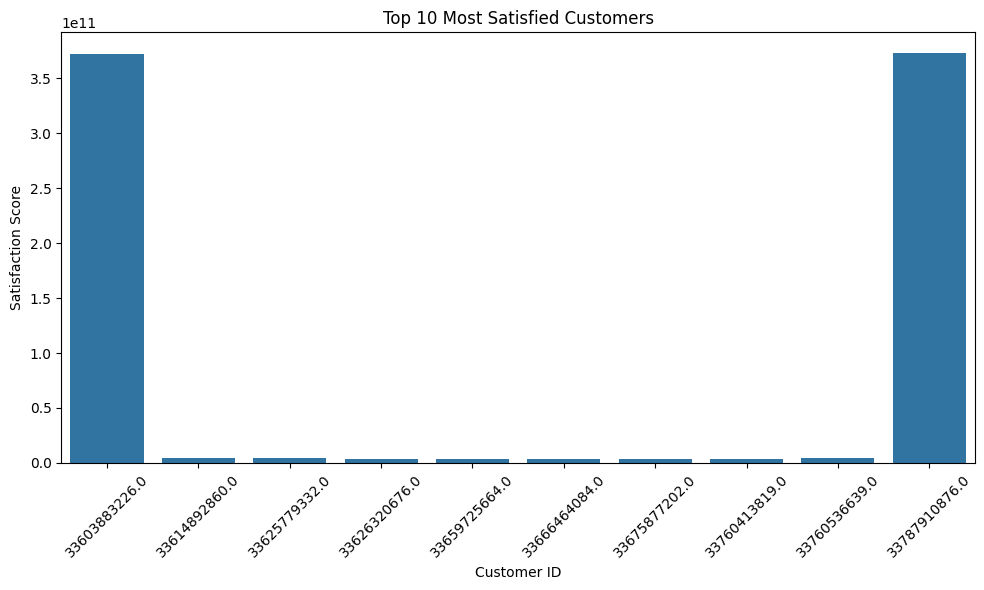

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="msisdn/number", y="satisfaction_score", data=top_customers)
plt.title("Top 10 Most Satisfied Customers")
plt.xlabel("Customer ID")
plt.ylabel("Satisfaction Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model Evaluation:
Mean Squared Error: 1259355664654936320.00
R^2 Score: 0.81
              Actual     Predicted
88793   6.291372e+07  6.281761e+07
102576  2.016846e+08  2.017334e+08
78511   3.805275e+08  3.804865e+08
34957   9.333828e+07  9.333707e+07
79502   4.269654e+08  4.269674e+08


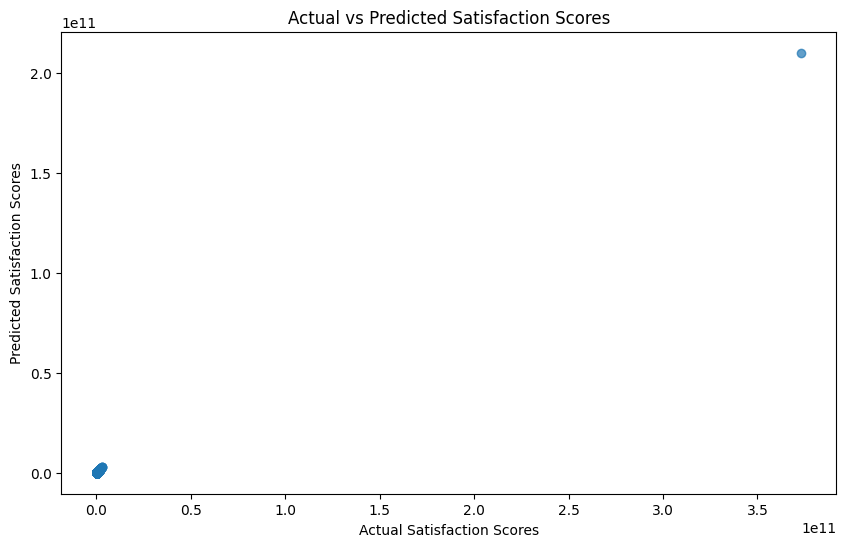

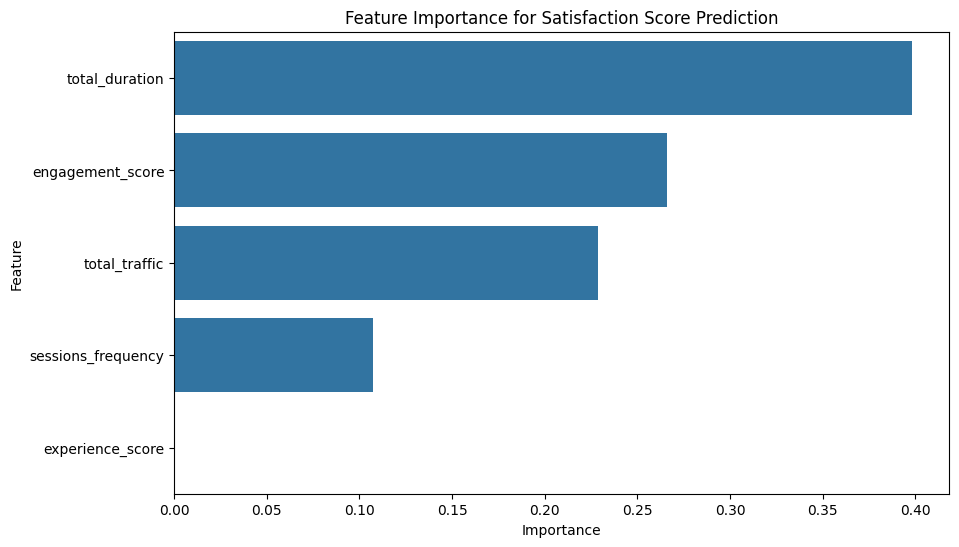

In [8]:
# Import necessary modules
from src.analysis.satisisfaction_analysis import train_regression_model

# Define relevant features for prediction
features = ["engagement_score", "experience_score", "sessions_frequency", "total_duration", "total_traffic"]

# Train Regression Model
model, X_test, y_test, predictions = train_regression_model(satisfaction_df, features)

# Display Test Results
import pandas as pd

results_df = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
print(results_df.head())

# Visualization: Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.title("Actual vs Predicted Satisfaction Scores")
plt.xlabel("Actual Satisfaction Scores")
plt.ylabel("Predicted Satisfaction Scores")
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance for Satisfaction Score Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


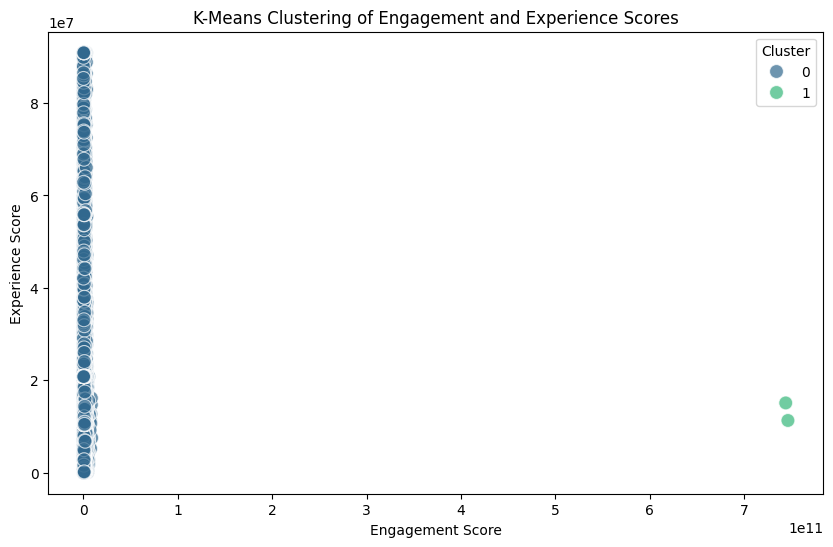

Cluster Centers:
[[6.91315101e+08 1.51301379e+07]
 [7.45029086e+11 1.32060117e+07]]


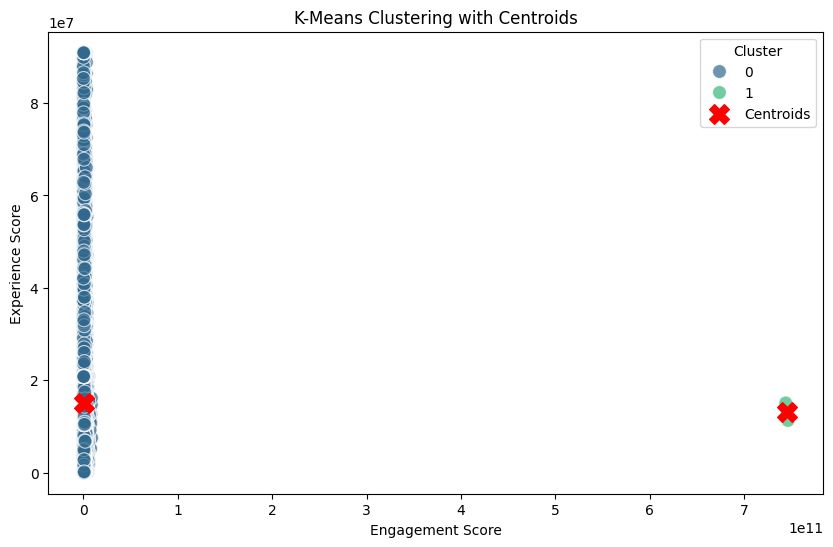

In [9]:
# Import necessary functions
from src.analysis.satisisfaction_analysis import cluster_users_by_satisfaction, plot_clusters

# Perform Clustering
satisfaction_df, satisfaction_kmeans = cluster_users_by_satisfaction(satisfaction_df, k=2)

# Visualize Clusters
plot_clusters(satisfaction_df)

# Analyze Cluster Centroids
print("Cluster Centers:")
print(satisfaction_kmeans.cluster_centers_)

# Add Cluster Centroids to the Plot
import matplotlib.pyplot as plt

centroids = satisfaction_kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="engagement_score",
    y="experience_score",
    hue="satisfaction_cluster",
    palette="viridis",
    data=satisfaction_df,
    s=100,
    alpha=0.7
)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering with Centroids")
plt.xlabel("Engagement Score")
plt.ylabel("Experience Score")
plt.legend(title="Cluster", loc="best")
plt.show()


In [10]:
# Import the aggregate function
from src.analysis.satisisfaction_analysis import aggregate_scores_by_cluster

# Compute aggregate scores
cluster_aggregates = aggregate_scores_by_cluster(satisfaction_df)

# Display the results
print("Cluster Aggregates:")
print(cluster_aggregates)

Cluster Aggregates:
   satisfaction_cluster  avg_satisfaction_score  avg_experience_score  \
0                     0            3.532226e+08          1.513014e+07   
1                     1            3.725211e+11          1.320601e+07   

   avg_engagement_score  cluster_size  
0          6.913151e+08        105415  
1          7.450291e+11             2  
